# Project Title: Sales Analysis


## By
- **Wafa Aldalbahi**
- **Mashael Asiri**
- **Shimah Almutairi**


## Project Statement:

AAL is a household name in Australia, known for its clothing business since 2000. It caters to all groups— kids, women, men, and seniors. It has opened branches in many states in Australia, in metropolises and tier-1 and tier-2 cities. 
The business is booming, and the company is in an expansion mode. It wants to get an in-depth understanding of its sales so that it can make investment decisionsThe CEO has tasked the Head of Sales and Marketing (S&M) of AAL to 

**1- Determine the states that are generating the highest revenues**

**2- Formulate sales programs for states with lower revenues.** 


The Head of S and M has approached you for the same. ame.
Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming ear. 



# Sales Dataset Explanation
**The dataset "AusApparelSales4thQrt2020.csv" was provided from SimblyLearn Company**

**The dataset "AusApparelSales4thQrt2020.csv" contains the following columns with their respective descriptions:**

- **Date:** The date of the transaction or sales record, formatted as "day-month-year".
- **Time:** The time of day when the sale occurred, categorized broadly (e.g., Morning, Afternoon).
- **State:** The Australian state where the sale took place.
- **Group:** The demographic group or category of apparel sold (e.g., Kids, Men, Women, Seniors).
- **Unit:** The number of units sold in that transaction.
- **Sales:** The total sales amount for that transaction, presumably in Australian dollars.

## Import Libraries

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

## Load Dataset

In [50]:
df = pd.read_csv('AusApparalSales4thQrt2020.csv')


### Exploring your data / Diagnosis phase

When you get a new DataFrame to work with, the first thing you need to do is explore it and see what it contains. There are several useful methods and attributes for this.

- .head() returns the first few rows (the “head” of the DataFrame).
- .tail() returns the first few rows (the “tail” of the DataFrame).
- .info() shows information on each of the columns, such as the data type and number of missing values.
- .shape returns the number of rows and columns of the DataFrame.
- .columns: An index of columns: the column names.


In [51]:
df.head()

,Date,Time,State,Group,Unit,Sales
0,1-Oct-2020,Morning,WA,Kids,8,20000
1,1-Oct-2020,Morning,WA,Men,8,20000
2,1-Oct-2020,Morning,WA,Women,4,10000
3,1-Oct-2020,Morning,WA,Seniors,15,37500
4,1-Oct-2020,Afternoon,WA,Kids,3,7500


In [52]:
df.tail()

,Date,Time,State,Group,Unit,Sales
7555,30-Dec-2020,Afternoon,TAS,Seniors,14,35000
7556,30-Dec-2020,Evening,TAS,Kids,15,37500
7557,30-Dec-2020,Evening,TAS,Men,15,37500
7558,30-Dec-2020,Evening,TAS,Women,11,27500
7559,30-Dec-2020,Evening,TAS,Seniors,13,32500


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7560 entries, 0 to 7559
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Date    7560 non-null   object
 1   Time    7560 non-null   object
 2   State   7560 non-null   object
 3   Group   7560 non-null   object
 4   Unit    7560 non-null   int64 
 5   Sales   7560 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 354.5+ KB


In [54]:
df.shape

(7560, 6)

## part 1: Data Wranglinga

#### Step 1: Checking for Missing Values

Ensure that the data is clean and that there is no missing or incorrect data. - 	Inspect the data manually for missing/incorrect data using the functions isna(), and notna(


In [55]:
 # Count of missing values in each column
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


- **Note**
The output indicates that there are no missing values in any of the columns of the dataset. Each column has 0 missing values. This suggests that the dataset is complete and does not require any handling of missing values**

In [56]:
incorrect_data = df[df.notna().any(axis=1)]  # Filtering out rows with any non-missing data
# In this case, we are assuming incorrect data refers to any data that is not missing
print("\nRows with Incorrect Data:")
print(incorrect_data)


Rows with Incorrect Data:
             Date        Time State     Group  Unit  Sales
0      1-Oct-2020     Morning    WA      Kids     8  20000
1      1-Oct-2020     Morning    WA       Men     8  20000
2      1-Oct-2020     Morning    WA     Women     4  10000
3      1-Oct-2020     Morning    WA   Seniors    15  37500
4      1-Oct-2020   Afternoon    WA      Kids     3   7500
...           ...         ...   ...       ...   ...    ...
7555  30-Dec-2020   Afternoon   TAS   Seniors    14  35000
7556  30-Dec-2020     Evening   TAS      Kids    15  37500
7557  30-Dec-2020     Evening   TAS       Men    15  37500
7558  30-Dec-2020     Evening   TAS     Women    11  27500
7559  30-Dec-2020     Evening   TAS   Seniors    13  32500

[7560 rows x 6 columns]


- **Note:**
The output indicates that there are no rows with incorrect data. All rows seem to contain valid values in each column, as there are no obvious anomalies or inconsistencies. Therefore, no further action is required regarding incorrect data.)

#### Step2:Treating Missing Data and incorrect data (if any)

- Based on your knowledge of Data Analytics, include your recommendations for treating missing data and incorrect data. (dropping the null values or filling them)

In [57]:
# Treating Missing Data 
# 1- Remove columns with more than 50% missing values
threshold = len(df) / 2
df = df.dropna(thresh=threshold, axis=1)

# 2- Fill missing values: numerical columns with the median, categorical with the mode
for column in df.columns:
    if df[column].dtype == 'object':  # Categorical column
        df[column].fillna(df[column].mode()[0], inplace=True)
    else:  # Numerical column
        df[column].fillna(df[column].median(), inplace=True)

# 3- Verify the cleaning (optional)
print(df.isnull().sum())  # Should show 0 for all columns


Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64


In [58]:
# Treating incorrect data 
# 1- check columns values
for i in df.columns:
    x = df[i].value_counts()
    print("Column name ",i," has different values of:",len(x))

Column name  Date  has different values of: 90
Column name  Time  has different values of: 3
Column name  State  has different values of: 7
Column name  Group  has different values of: 4
Column name  Unit  has different values of: 64
Column name  Sales  has different values of: 64


In [13]:
# Treating incorrect data 
# 2- check columns values for objects data type   
#check the arrival_date_month column values if there is entering error
# Columns you want to check for unique values
columns_to_check = ['Date','Time','State','Group']

# Iterate over the columns and print the unique values for each
for column in columns_to_check:
    unique_values = df[column].unique()
    print(f"Unique values in '{column}' column:", unique_values)

Unique values in 'Date' column: ['1-Oct-2020' '2-Oct-2020' '3-Oct-2020' '4-Oct-2020' '5-Oct-2020'
 '6-Oct-2020' '7-Oct-2020' '8-Oct-2020' '9-Oct-2020' '10-Oct-2020'
 '11-Oct-2020' '12-Oct-2020' '13-Oct-2020' '14-Oct-2020' '15-Oct-2020'
 '16-Oct-2020' '17-Oct-2020' '18-Oct-2020' '19-Oct-2020' '20-Oct-2020'
 '21-Oct-2020' '22-Oct-2020' '23-Oct-2020' '24-Oct-2020' '25-Oct-2020'
 '26-Oct-2020' '27-Oct-2020' '28-Oct-2020' '29-Oct-2020' '30-Oct-2020'
 '1-Nov-2020' '2-Nov-2020' '3-Nov-2020' '4-Nov-2020' '5-Nov-2020'
 '6-Nov-2020' '7-Nov-2020' '8-Nov-2020' '9-Nov-2020' '10-Nov-2020'
 '11-Nov-2020' '12-Nov-2020' '13-Nov-2020' '14-Nov-2020' '15-Nov-2020'
 '16-Nov-2020' '17-Nov-2020' '18-Nov-2020' '19-Nov-2020' '20-Nov-2020'
 '21-Nov-2020' '22-Nov-2020' '23-Nov-2020' '24-Nov-2020' '25-Nov-2020'
 '26-Nov-2020' '27-Nov-2020' '28-Nov-2020' '29-Nov-2020' '30-Nov-2020'
 '1-Dec-2020' '2-Dec-2020' '3-Dec-2020' '4-Dec-2020' '5-Dec-2020'
 '6-Dec-2020' '7-Dec-2020' '8-Dec-2020' '9-Dec-2020' '10-Dec-2020'
 

- **Notes**
the output indicates that All rows seem to contain valid values in each column, as there are no obvious anomalies or inconsistencies. Therefore, no further action is required regarding incorrect data.

#### Step3: Check for duplicates (if any)

In [59]:
# Step: Check for duplicates
duplicates = df[df.duplicated()]
print("Duplicate Rows:")
print(duplicates)

Duplicate Rows:
Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales]
Index: []


- **Note:**
The output indicates that there are no duplicate rows in the dataset. This means that each row is unique, and there are no exact duplicates of any row in the dataset. Therefore, no further action is required regarding duplicate rows.

- **Display the first few rows of the cleaned datasets**

In [60]:
# Display the first few rows of the cleaned dataset
print(df.head())

         Date        Time State     Group  Unit  Sales
0  1-Oct-2020     Morning    WA      Kids     8  20000
1  1-Oct-2020     Morning    WA       Men     8  20000
2  1-Oct-2020     Morning    WA     Women     4  10000
3  1-Oct-2020     Morning    WA   Seniors    15  37500
4  1-Oct-2020   Afternoon    WA      Kids     3   7500


#### Step 4: Check and Change the Columns Data Type

In [61]:
# Check the Columns Data Type
data_types = df.dtypes

# Display the data types
print(data_types)

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object


In [62]:
#change the columns data type
df['Date'] = pd.to_datetime(df['Date'])
# Assuming 'Time' contains categorical values like 'Morning', 'Afternoon', etc., convert it to category type
df['Time'] = df['Time'].astype('category')
df['State'] = df['State'].astype('category')
df['Group'] = df['Group'].astype('category')

In [63]:
data_types = df.dtypes

# Display the data types
print(data_types)

Date     datetime64[ns]
Time           category
State          category
Group          category
Unit              int64
Sales             int64
dtype: object


#### Step 5: Data Normalization
- Select an appropriate Data Wrangling approach —  data standardization or data normalization. Perform the standardization or normalization and present the data. (Normalization is the preferred approach for this problem.)

In [64]:
from sklearn.preprocessing import MinMaxScaler
# Select numerical columns to normalize
#numerical_columns = ['Unit', 'Sales']

# Initialize the MinMaxScaler
#scaler = MinMaxScaler()

# Fit and transform the selected numerical columns
#df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the normalized data
#print("Normalized Data:")
#print(df.head())


#### Step 6:  usage of the groupby() function for data chunking or merging


In [65]:
# Grouping by 'State' and 'Group' to analyze sales performance for different product categories within each state
grouped_data = df.groupby(['State', 'Group'], observed=False)

# Calculate total sales revenue and average units sold for each group within each state
summary_stats = grouped_data.agg({'Sales': 'sum', 'Unit': 'mean'})

# Display the summary statistics
print("Summary Statistics:")
print(summary_stats)

Summary Statistics:
                   Sales       Unit
State Group                        
 NSW   Kids     18587500  27.537037
       Men      19022500  28.181481
       Seniors  18187500  26.944444
       Women    19172500  28.403704
 NT    Kids      5700000   8.444444
       Men       5762500   8.537037
       Seniors   5465000   8.096296
       Women     5652500   8.374074
 QLD   Kids      8510000  12.607407
       Men       8392500  12.433333
       Seniors   8190000  12.133333
       Women     8325000  12.333333
 SA    Kids     14515000  21.503704
       Men      14655000  21.711111
       Seniors  14717500  21.803704
       Women    14970000  22.177778
 TAS   Kids      5775000   8.555556
       Men       5757500   8.529630
       Seniors   5650000   8.370370
       Women     5577500   8.262963
 VIC   Kids     26360000  39.051852
       Men      26407500  39.122222
       Seniors  26315000  38.985185
       Women    26482500  39.233333
 WA    Kids      5625000   8.333333
       M

1. Data Chunking:

Use groupby() to split your data into groups based on one or more categorical variables. This is useful when you want to perform operations on subsets of your data.
For example, you can group sales data by 'State' to analyze sales performance for each state separately.

In [66]:
# Grouping the data by 'State' for data chunking
grouped_data = df.groupby('State', observed=False)
# Iterating over each group and displaying the first few rows of each group
for state, group in grouped_data:
    print(f"State: {state}")
    print(group.head())
    print()

State:  NSW
         Date        Time State     Group  Unit   Sales
60 2020-10-01     Morning   NSW      Kids    39   97500
61 2020-10-01     Morning   NSW       Men    17   42500
62 2020-10-01     Morning   NSW     Women    34   85000
63 2020-10-01     Morning   NSW   Seniors    23   57500
64 2020-10-01   Afternoon   NSW      Kids    40  100000

State:  NT
         Date        Time State     Group  Unit  Sales
12 2020-10-01     Morning    NT      Kids    13  32500
13 2020-10-01     Morning    NT       Men     5  12500
14 2020-10-01     Morning    NT     Women     4  10000
15 2020-10-01     Morning    NT   Seniors    10  25000
16 2020-10-01   Afternoon    NT      Kids    13  32500

State:  QLD
         Date        Time State     Group  Unit  Sales
48 2020-10-01     Morning   QLD      Kids    20  50000
49 2020-10-01     Morning   QLD       Men    18  45000
50 2020-10-01     Morning   QLD     Women    15  37500
51 2020-10-01     Morning   QLD   Seniors    14  35000
52 2020-10-01   Aftern

2. Aggregation:

After grouping your data, you can apply aggregation functions like sum(), mean(), count(), etc., to compute summary statistics for each group.
Aggregation allows you to condense the data into a more manageable form, making it easier to analyze and interpret.
For instance, you can calculate total sales revenue and average units sold for each state.

In [67]:
# Grouping the data by 'State' for aggregation
grouped_data = df.groupby('State', observed=False)

# Calculating total sales revenue and average units sold for each state
summary_statistics = grouped_data.agg({'Sales': 'sum', 'Unit': 'mean'})

# Displaying the summary statistics
print("Summary Statistics:")
print(summary_statistics)

Summary Statistics:
           Sales       Unit
State                      
 NSW    74970000  27.766667
 NT     22580000   8.362963
 QLD    33417500  12.376852
 SA     58857500  21.799074
 TAS    22760000   8.429630
 VIC   105565000  39.098148
 WA     22152500   8.204630


3. Merging:
- You can use groupby() in conjunction with other operations like merging to combine data from multiple sources based on common keys.
- This is helpful when you have multiple datasets that you want to combine and analyze together.
For example, you can group one dataset by a key and then merge it with another dataset that contains additional information about each group.

4. Iterating Over Groups:

- The groupby() object supports iteration, allowing you to loop over each group and perform custom operations as needed.
- This is useful when you need to apply different transformations or analyses to each group separately.
For instance, you can iterate over each state and calculate various statistics or generate plots for each state individually.

In [68]:
# Grouping the data by 'State' for iteration
grouped_data = df.groupby('State', observed=False)

# Iterate over each group and calculate total sales revenue for each state
for state, group_data in grouped_data:
    total_sales = group_data['Sales'].sum()
    print(f"State: {state}, Total Sales: {total_sales}")

State:  NSW, Total Sales: 74970000
State:  NT, Total Sales: 22580000
State:  QLD, Total Sales: 33417500
State:  SA, Total Sales: 58857500
State:  TAS, Total Sales: 22760000
State:  VIC, Total Sales: 105565000
State:  WA, Total Sales: 22152500




## Part 2: Data Analysis

- With clean data, analysts can delve deeper into exploring patterns, trends, and relationships within the dataset.
- Statistical techniques, machine learning algorithms, and data mining methods are applied to analyze the data further.
- Analysts may perform hypothesis testing, regression analysis, clustering, classification, or other advanced analytics to extract actionable insights.


**1. Perform descriptive statistical analysis on the data (Sales and Unit columns) (Techniques such as mean, median, mode and standard deviation can be used.).**


In [69]:
sales_stats = df['Sales'].describe()
# Display the descriptive statistics
print("Descriptive Statistics for Sales:")
print(sales_stats)


Descriptive Statistics for Sales:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64


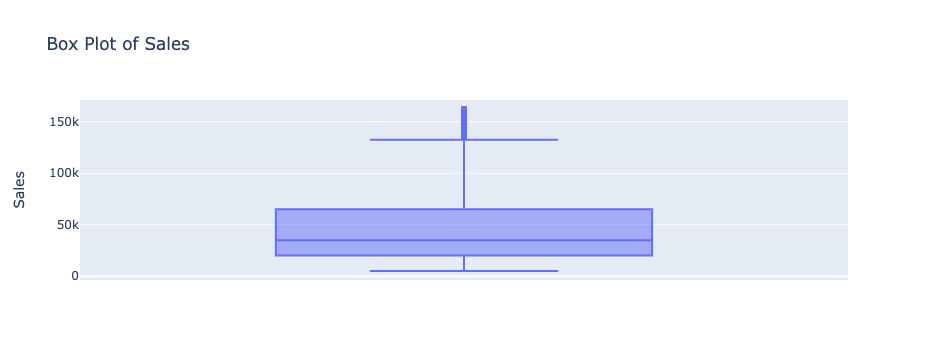

In [70]:
fig = px.box(df, y='Sales', title="Box Plot of Sales")

# Show the plot
fig.show()

In [71]:
unit_stats = df['Unit'].describe()
# Display the descriptive statistics
print("Descriptive Statistics for unit_stats:")
print(sales_stats)

Descriptive Statistics for unit_stats:
count      7560.000000
mean      45013.558201
std       32253.506944
min        5000.000000
25%       20000.000000
50%       35000.000000
75%       65000.000000
max      162500.000000
Name: Sales, dtype: float64


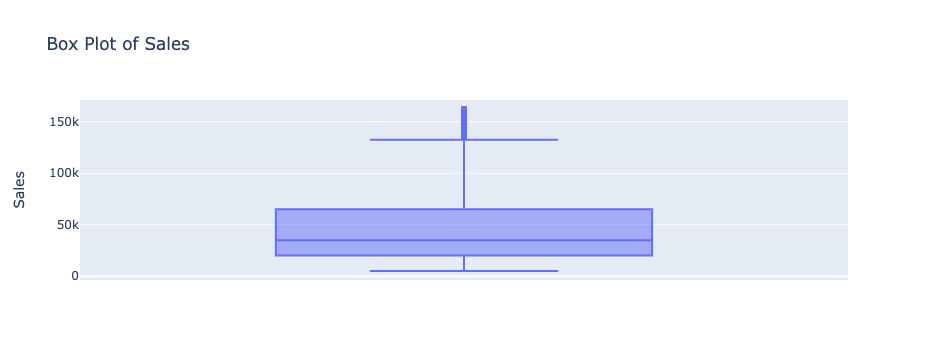

In [72]:
fig = px.box(df, y='Sales', title="Box Plot of Sales")

# Show the plot
fig.show()

**2. Determine which group is generating the highest sales, and which group is generating the lowest sales.**

In [74]:
# Grouping the data by 'Group' and calculating total sales for each group
group_sales = df.groupby('Group', observed=False)['Sales'].sum()
# Finding the group with the highest sales
max_sales_group = group_sales.idxmax()  # Index of the group with maximum sales
max_sales_value = group_sales.max()     # Maximum sales value

# Finding the group with the lowest sales
min_sales_group = group_sales.idxmin()  # Index of the group with minimum sales
min_sales_value = group_sales.min()     # Minimum sales value

# Displaying the results
print("Group generating the highest sales:", max_sales_group)
print("Total sales:", max_sales_value)
print()
print("Group generating the lowest sales:", min_sales_group)
print("Total sales:", min_sales_value)

Group generating the highest sales:  Men
Total sales: 85750000

Group generating the lowest sales:  Seniors
Total sales: 84037500


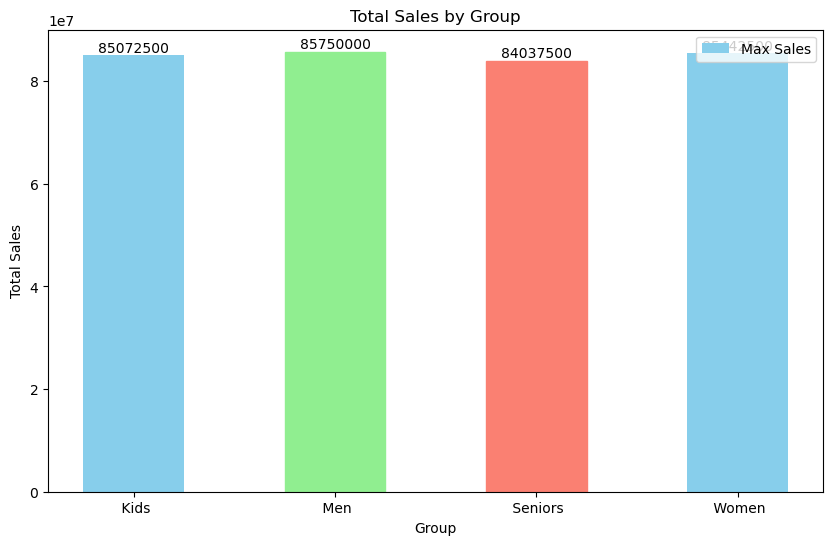

In [75]:
# Calculate the groups with the max and min sales for color differentiation
max_sales_group = group_sales.idxmax()
min_sales_group = group_sales.idxmin()

plt.figure(figsize=(10, 6))
# Adjust the width of the bars here
bar_width = 0.5  # Reduce the width to make bars thinner
bars = plt.bar(group_sales.index, group_sales, color='skyblue', width=bar_width)

# Add labels and title
plt.xlabel('Group')
plt.ylabel('Total Sales')
plt.title('Total Sales by Group')

# Loop through the bars and add the total sales above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, int(yval), va='bottom', ha='center')

# Change the color of the bar for the group with the max and min sales
bars[group_sales.index.get_loc(max_sales_group)].set_color('lightgreen')  # Highlight max sales group
bars[group_sales.index.get_loc(min_sales_group)].set_color('salmon')  # Highlight min sales group

# Optionally, you can add a legend to explain the color coding
plt.legend(['Max Sales', 'Min Sales', 'Other Groups'])

plt.show()

**3. Determine which state is generating the highest sales, and which state is generating the lowest sales..**

In [77]:
# Grouping the data by 'State' and calculating total sales for each state
state_sales = df.groupby('State', observed=False)['Sales'].sum()

# Finding the state with the highest sales
max_sales_state = state_sales.idxmax()  # Index of the state with maximum sales
max_sales_value = state_sales.max()     # Maximum sales value

# Finding the state with the lowest sales
min_sales_state = state_sales.idxmin()  # Index of the state with minimum sales
min_sales_value = state_sales.min()     # Minimum sales value

# Displaying the results
print("State generating the highest sales:", max_sales_state)
print("Total sales:", max_sales_value)
print()
print("State generating the lowest sales:", min_sales_state)
print("Total sales:", min_sales_value)

State generating the highest sales:  VIC
Total sales: 105565000

State generating the lowest sales:  WA
Total sales: 22152500


/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_53439/4005497446.py:2: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



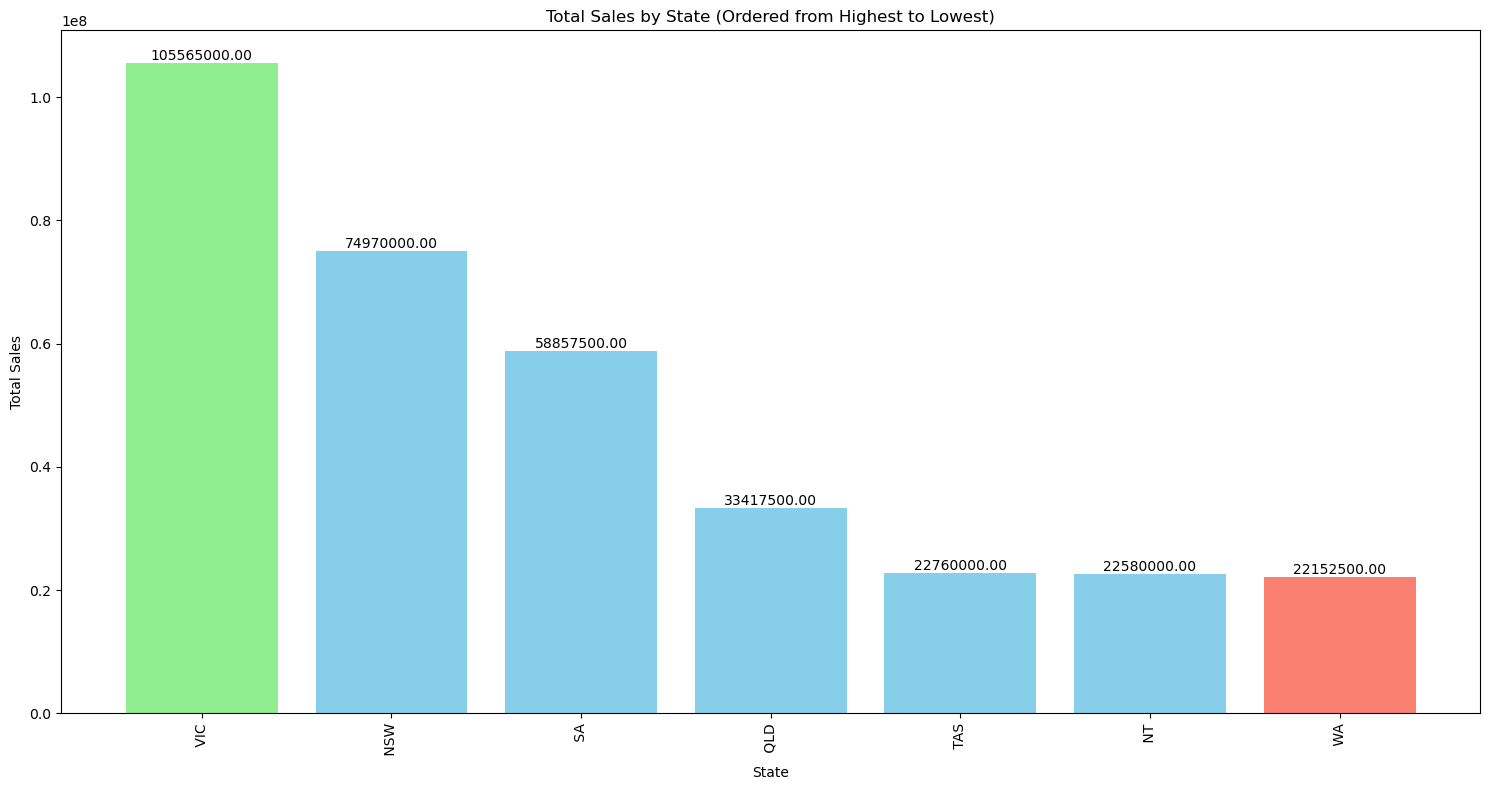

In [78]:
# Grouping the data by 'State' and calculating total sales for each state, then sorting from highest to lowest
state_sales_sorted = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Finding the state with the highest and lowest sales from the sorted data
max_sales_state = state_sales_sorted.index[0]  # First entry will be the highest
min_sales_state = state_sales_sorted.index[-1] # Last entry will be the lowest

# Plotting
plt.figure(figsize=(15, 8))  # Adjust the figure size as necessary
states = state_sales_sorted.index
sales = state_sales_sorted.values

bar_colors = ['lightgreen' if state == max_sales_state else 'salmon' if state == min_sales_state else 'skyblue' for state in states]

bars = plt.bar(states, sales, color=bar_colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State (Ordered from Highest to Lowest)')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding

plt.show()

**4. Generate weekly, monthly and quarterly reports for the analysis made.
(Use suitable libraries such as NumPy, Pandas, SciPy etc. for performing the analysis.)..**

In [79]:
# Set 'Date' column as index
df.set_index('Date', inplace=True)
df.head()

,Time,State,Group,Unit,Sales
Date,,,,,
2020-10-01,Morning,WA,Kids,8,20000
2020-10-01,Morning,WA,Men,8,20000
2020-10-01,Morning,WA,Women,4,10000
2020-10-01,Morning,WA,Seniors,15,37500
2020-10-01,Afternoon,WA,Kids,3,7500


In [82]:
# Generate weekly report (excluding categorical columns)
weekly_report = df.drop(columns=['Time', 'State', 'Group']).resample('W').sum()

# Generate monthly report (excluding categorical columns)
monthly_report = df.drop(columns=['Time', 'State', 'Group']).resample('M').sum()

# Generate quarterly report (excluding categorical columns)
quarterly_report = df.drop(columns=['Time', 'State', 'Group']).resample('Q').sum()

# Display the reports
print("Weekly Report:")
print(weekly_report)
print("\nMonthly Report:")
print(monthly_report)
print("\nQuarterly Report:")
print(quarterly_report)

Weekly Report:
             Unit     Sales
Date                       
2020-10-04   6018  15045000
2020-10-11  10801  27002500
2020-10-18  10656  26640000
2020-10-25  10726  26815000
2020-11-01   8723  21807500
2020-11-08   8346  20865000
2020-11-15   8469  21172500
2020-11-22   8445  21112500
2020-11-29   8591  21477500
2020-12-06  11849  29622500
2020-12-13  12610  31525000
2020-12-20  12662  31655000
2020-12-27  12708  31770000
2021-01-03   5517  13792500

Monthly Report:
             Unit      Sales
Date                        
2020-10-31  45716  114290000
2020-11-30  36273   90682500
2020-12-31  54132  135330000

Quarterly Report:
              Unit      Sales
Date                         
2020-12-31  136121  340302500


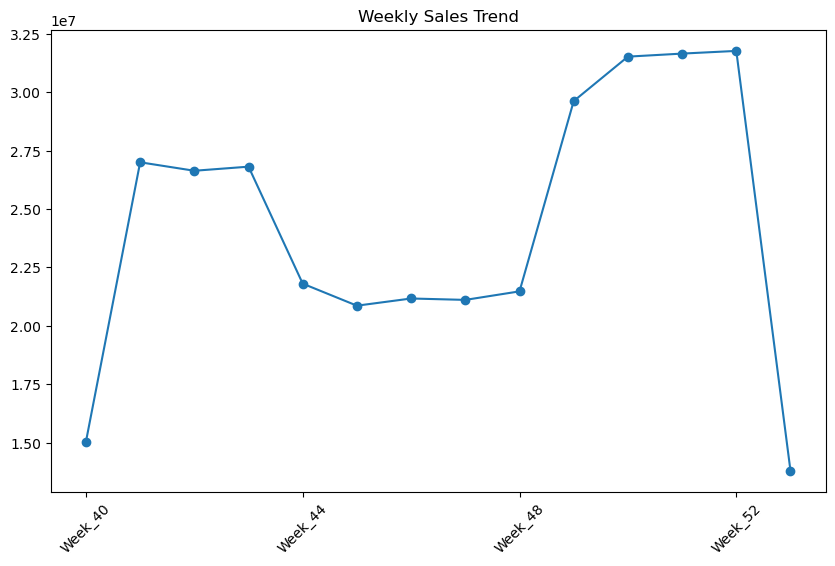

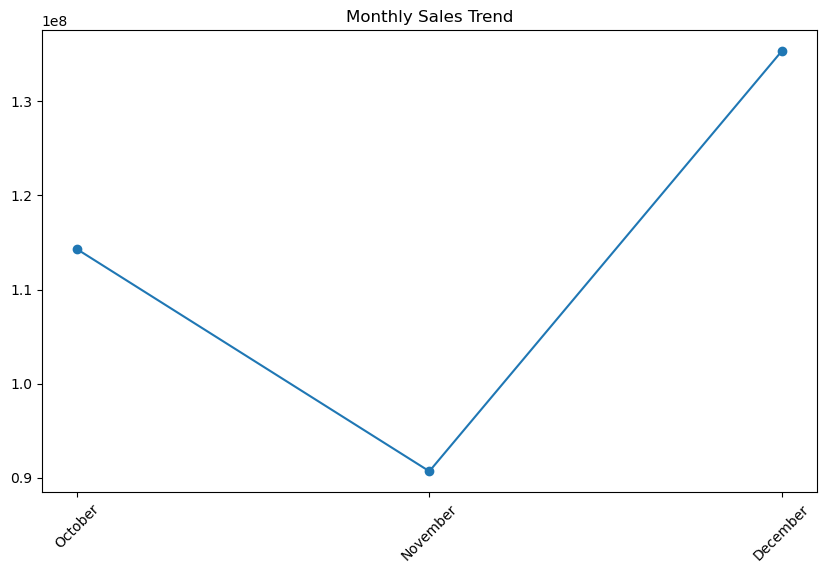

In [101]:
import matplotlib.pyplot as plt

# Extract week numbers from the index and add prefix
week_numbers = ['Week_' + week_num for week_num in weekly_report.index.strftime('%U')]  # Assuming week starts on Sunday, use '%W' if it starts on Monday

# Plotting weekly report
plt.figure(figsize=(10, 6))
plt.plot(week_numbers, weekly_report['Sales'], marker='o', label='Weekly Sales')

# Adding  title
plt.title('Weekly Sales Trend')
# Show only every nth label on the x-axis
n = 4  # Show every 4th label
plt.xticks(week_numbers[::n])

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()


import matplotlib.pyplot as plt

# Extract month names from the index
month_names = monthly_report.index.strftime('%B')

# Plotting monthly report
plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_report['Sales'], marker='o', label='Monthly Sales')

# Adding title
plt.title('Monthly Sales Trend')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show plot
plt.show()



### Weekly, Monthly and quarterly reports for the analysis made


**Sales Drop (Week 45 to Week 47):**

- From week 45 to week 47, there is a noticeable drop in sales. Several factors could contribute to this decline:

- Seasonal Factors: Depending on the industry, this period might coincide with a seasonal downturn where consumer spending typically decreases.
- External Events: External factors such as economic downturns, unfavorable weather conditions, or public holidays may influence consumer behavior and lead to reduced sales.
- Marketing Efforts: If there were no significant marketing campaigns or promotions during this period, it could result in decreased customer engagement and lower sales.

  **Sales Spike (Week 48):**

- Week 48 shows a sudden spike in sales, indicating a significant increase compared to the previous weeks. Possible reasons for this spike include:

- Promotional Events: Special promotions, discounts, or sales events might have been implemented during week 48, attracting more customers and driving higher sales.
- Holiday Shopping: Week 48 could coincide with holiday shopping events such as Black Friday or Cyber Monday, where consumers tend to make more purchases, resulting in increased sales.
- Inventory Clearance: Retailers might offer clearance sales or discounts to clear out excess inventory before the end of the year, leading to a surge in sales..e in sales..


## part 3: Data Visualization and Report Generation

- Cleaned data is visualized using charts, graphs, plots, and interactive dashboards to facilitate understanding and exploration.
- Visualizations help in identifying trends, outliers, correlations, and patterns that may not be apparent from raw data alone.
- Visualization tools like matplotlib, Seaborn, Plotly, or Tableau are commonly used to create insightful visual representations of the data
- Reports include summaries of key findings, insights derived from the analysis, and actionable recommendations.


**Use appropriate data visualization libraries to build a dashboard for the Head of S&M that includes for the key parameters like**


**State-wise sales analysis for different groups (kids, women, men, and seniors].**


In [34]:
pip install plotly dash

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


# Dashboard for the Head of S&M

**State-wise sales analysis for different groups (kids, women, men, and seniors)** 

**Group-wise sales analysis (kids, women, men, and seniors) across different states.**

**Time-of-the-day analysis: during which time of the day are sales the highest, and during which time are sales the lowest?**

In [94]:
#Dashboard CODE
from dash import Dash, html, dcc, Input, Output
import plotly.express as px
import pandas as pd


# Group the data as needed for the plots
df_grouped = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
df_grouped_time = df.groupby('Time')['Sales'].sum().reset_index()

app = Dash(__name__)

# Dropdown for selecting a State
state_dropdown = dcc.Dropdown(
    id='state-dropdown',
    options=[{'label': state, 'value': state} for state in df['State'].unique()],
    value=df['State'].unique()[0],  # Default value
    clearable=False
)

# Dropdown for selecting a Group
group_dropdown = dcc.Dropdown(
    id='group-dropdown',
    options=[{'label': group, 'value': group} for group in df['Group'].unique()],
    value=df['Group'].unique()[0],  # Default value
    clearable=False
)

# Graph component to display state-wise sales analysis
state_sales_graph = dcc.Graph(id='state-sales-graph')

# Graph component to display group-wise sales analysis
group_sales_graph = dcc.Graph(id='group-sales-graph')

# Graph component to display time-of-day sales analysis
time_sales_graph = dcc.Graph(id='time-sales-graph')

@app.callback(
    Output('state-sales-graph', 'figure'),
    [Input('state-dropdown', 'value')]
)
def update_state_graph(selected_state):
    filtered_df = df_grouped[df_grouped['State'] == selected_state]
    fig = px.bar(filtered_df, x='Group', y='Sales', color='Group', title=f'State-wise Sales Analysis for {selected_state}')
    return fig

@app.callback(
    Output('group-sales-graph', 'figure'),
    [Input('group-dropdown', 'value')]
)
def update_group_graph(selected_group):
    filtered_df = df.groupby(['State', 'Group'])['Sales'].sum().reset_index()
    filtered_df = filtered_df[filtered_df['Group'] == selected_group]
    fig = px.bar(filtered_df, x='State', y='Sales', color='State', title=f'Group-wise Sales Analysis for {selected_group}')
    return fig

@app.callback(
    Output('time-sales-graph', 'figure'),
    [Input('state-dropdown', 'value'), Input('group-dropdown', 'value')]
)
def update_time_graph(selected_state, selected_group):
    filtered_df = df[(df['State'] == selected_state) & (df['Group'] == selected_group)]
    filtered_df = filtered_df.groupby('Time')['Sales'].sum().reset_index()
    fig = px.bar(filtered_df, x='Time', y='Sales', color='Time', 
                  title=f'Time-of-Day Sales Analysis for {selected_state}, {selected_group}')
    return fig

app.layout = html.Div([
    html.H1("Sales Dashboard"),
    html.Div([
        html.Div([
            html.H3("Select a State:"),
            state_dropdown,
            state_sales_graph  # State-wise sales graph
        ], style={'width': '48%', 'display': 'inline-block'}),

        html.Div([
            html.H3("Select a Group:"),
            group_dropdown,
            group_sales_graph  # Group-wise sales graph
        ], style={'width': '48%', 'display': 'inline-block', 'float': 'right'}),
    ]),
    
    html.H2("Time-of-Day Sales Analysis"),
    time_sales_graph  # Time-of-day sales graph
])

if __name__ == '__main__':
    app.run_server(debug=True)

/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_53439/2610802016.py:8: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_53439/2610802016.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



State generating the highest sales:  VIC
Total sales: 105565000

State generating the lowest sales:  WA
Total sales: 22152500


/var/folders/tl/5427rtd52qn61143zy9xb62h0000gp/T/ipykernel_53439/405332662.py:21: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



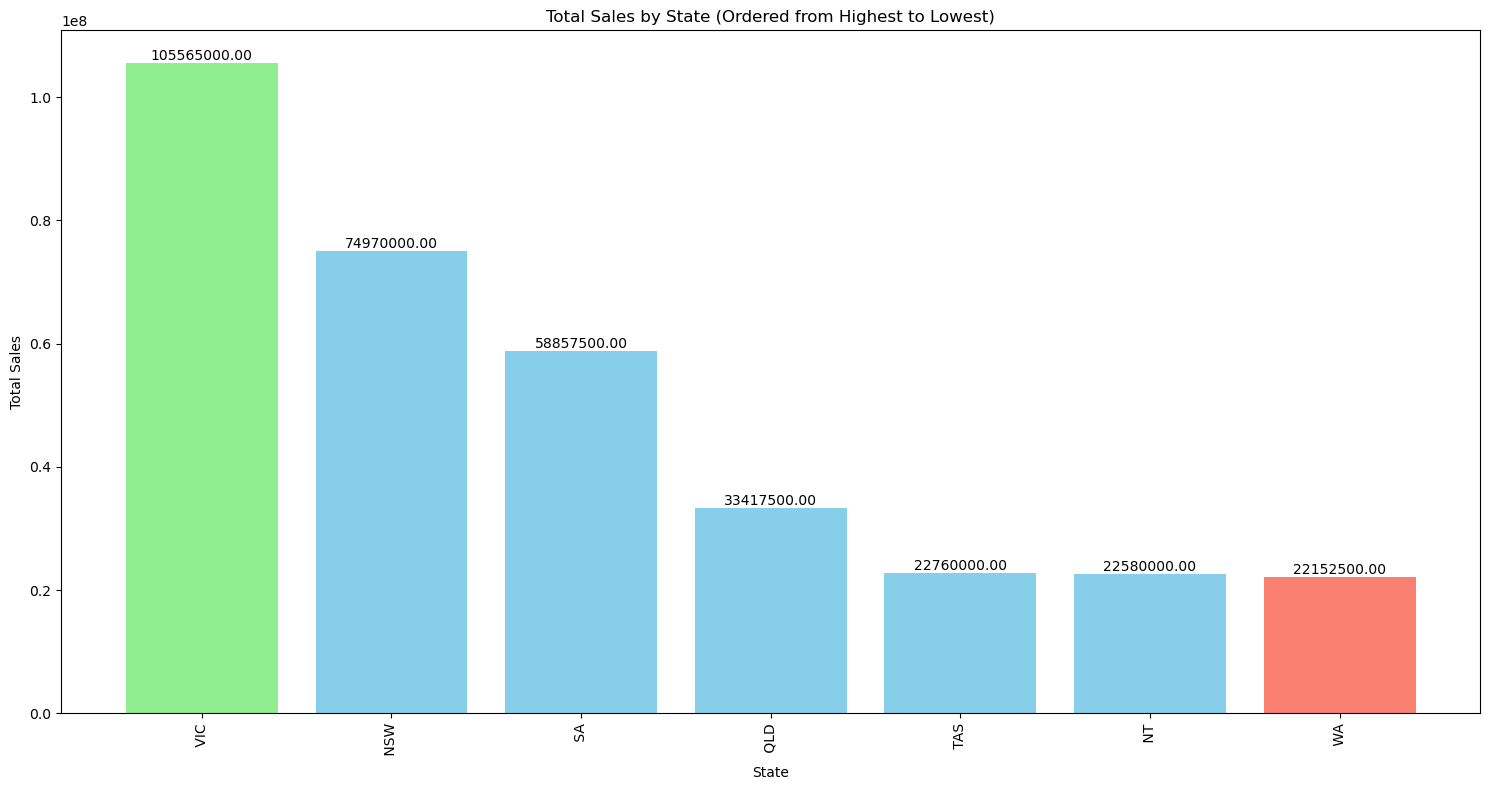

In [97]:
# Grouping the data by 'State' and calculating total sales for each state
state_sales = df.groupby('State', observed=False)['Sales'].sum()

# Finding the state with the highest sales
max_sales_state = state_sales.idxmax()  # Index of the state with maximum sales
max_sales_value = state_sales.max()     # Maximum sales value

# Finding the state with the lowest sales
min_sales_state = state_sales.idxmin()  # Index of the state with minimum sales
min_sales_value = state_sales.min()     # Minimum sales value

# Displaying the results
print("State generating the highest sales:", max_sales_state)
print("Total sales:", max_sales_value)
print()
print("State generating the lowest sales:", min_sales_state)
print("Total sales:", min_sales_value)


# Grouping the data by 'State' and calculating total sales for each state, then sorting from highest to lowest
state_sales_sorted = df.groupby('State')['Sales'].sum().sort_values(ascending=False)

# Finding the state with the highest and lowest sales from the sorted data
max_sales_state = state_sales_sorted.index[0]  # First entry will be the highest
min_sales_state = state_sales_sorted.index[-1] # Last entry will be the lowest

# Plotting
plt.figure(figsize=(15, 8))  # Adjust the figure size as necessary
states = state_sales_sorted.index
sales = state_sales_sorted.values

bar_colors = ['lightgreen' if state == max_sales_state else 'salmon' if state == min_sales_state else 'skyblue' for state in states]

bars = plt.bar(states, sales, color=bar_colors)

# Add value labels on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2.0, height, f'{height:.2f}', ha='center', va='bottom')

plt.xlabel('State')
plt.ylabel('Total Sales')
plt.title('Total Sales by State (Ordered from Highest to Lowest)')
plt.xticks(rotation=90)  # Rotate state names for better visibility
plt.tight_layout()  # Automatically adjust subplot parameters to give specified padding

plt.show()


**1- Determine the states that are generating the highest revenues**

- Victoria (VIC) emerges as the top revenue-generating state, followed by New South Wales (NSW) and South Australia (SA).
- These insights can guide strategic decisions regarding resource allocation, marketing campaigns, and expansion plans to further capitalize on the revenue potential in these states. : $106.37

**2- Formulate sales programs for states with lower revenues.** 

- Market Research and Customer Insights: Conduct market research and gather insights into consumer preferences, needs, and pain points in the low-revenue states. Utilize surveys, focus groups, and data analytics to gain a deeper understanding of customer behavior and preferences.

- Analyze the company’s sales data for the fourth quarter across Australia, and state by state and help the company make data-driven decisions for the coming year.

- Based on the weekly sales report, there is a noticeable drop in total sales around weeks 45 to 47, followed by a significant spike in sales around week 48. This fluctuation in sales could be attributed to various factors such as seasonal trends, promotional activities, or changes in consumer behavior.

# Recommendation for Head of Sales and Marketing (S&M)

**1- Strengthen Presence in High-Performing States:**
The state represented by 'VC' shows the highest sales, indicating a strong market presence. The company should consider reinforcing its presence in this state with more branches to capitalize on the strong demand.

**2- Evaluate Market Potential in Mid-Performing States:** States 'NSW', 'SA', and 'TAS' have moderate sales figures. It might be worth conducting market research to understand the potential for sales growth and customer demand in these areas before deciding on expansion.

**3- Understand Low Sales in 'NT' and 'WA':** The lower sales in 'NT' and 'WA' might be due to various factors such as less market penetration, weaker brand recognition, or demographic differences. It’s important to understand the reasons behind the lower sales before investing in new branches.

**4- Market Analysis and Consumer Behavior:** Detailed analysis of consumer behavior, preferences, and competitor performance in each state can provide insights into potential opportunities or challenges that could inform the expansion strategy.

**5- Branch Performance and Efficiency:**
Assess the performance and efficiency of existing branches. Successful models could be replicated in new locations, while underperforming branches may need strategic changes or even closure.

**6- Investment in Local Marketing Campaigns:** Designing state-specific marketing campaigns that cater to the local culture, needs, and consumer behavior could enhance brand presence and drive sales.

**7- Infrastructure and Logistics:** Ensure that the infrastructure and supply chain logistics can support the expansion. The locations for new branches should be chosen based on accessibility for customers and efficiency for distribution networks.

**8-Sales Channels Diversity:** Explore diverse sales channels like online marketplaces or pop-up stores in states with lower physical branch presence to increase market reach.

**9- Tailored Product/Service Offering:**
Adapt the product or service offerings to meet the unique needs of customers in each state which could help in attracting a wider customer base.

